# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np


In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")

print(map_box_api)

pk.eyJ1IjoiYmx1ZWhlYXZlbnp6eiIsImEiOiJja3FnZG15eGExc3U5MnRuMHRnbnRlb3Y2In0.w63MaPdA4Gw9d_BlLxUWfg


## Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [8]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!
dwelling_types = to_data[["neighbourhood", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]].groupby('year').sum()

dwelling_types


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [14]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

dwelling_types.to_csv('dwelling_types.csv')

In [15]:

# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel,fontsize=12)
    bar_chart.set_ylabel(ylabel,fontsize=12)
    bar_chart.set_title(title, fontsize=14, fontweight= "bold")
    plt.show()
    plt.close(fig)

<Figure size 432x288 with 0 Axes>

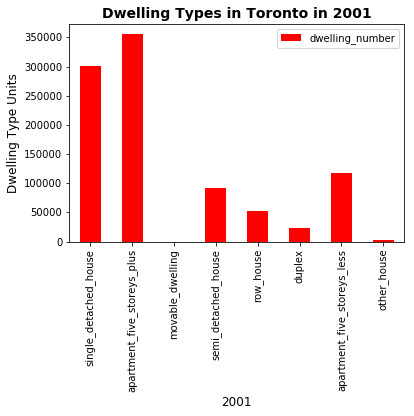

In [16]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
# YOUR CODE HERE!

create_bar_chart(dwelling_types_2001, 'Dwelling Types in Toronto in 2001', '2001', 'Dwelling Type Units', 'red')


<Figure size 432x288 with 0 Axes>

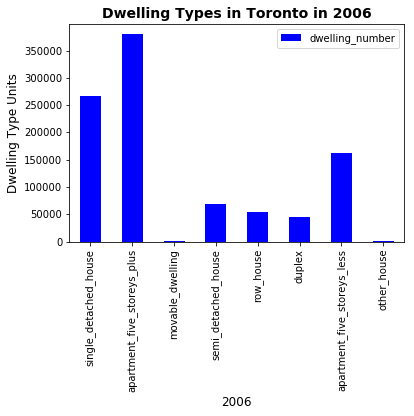

In [17]:
# Bar chart for 2006
# YOUR CODE HERE!

create_bar_chart(dwelling_types_2006, 'Dwelling Types in Toronto in 2006', '2006', 'Dwelling Type Units', 'blue')

<Figure size 432x288 with 0 Axes>

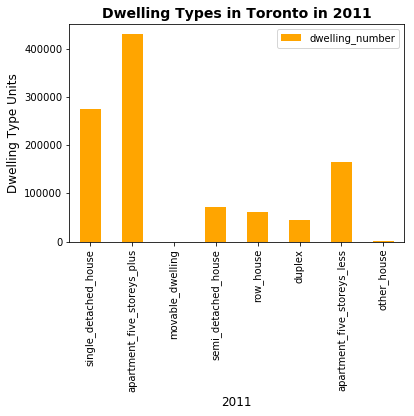

In [18]:
# Bar chart for 2011
# YOUR CODE HERE!

create_bar_chart(dwelling_types_2011, 'Dwelling Types in Toronto in 2011', '2011', 'Dwelling Type Units', 'orange')

<Figure size 432x288 with 0 Axes>

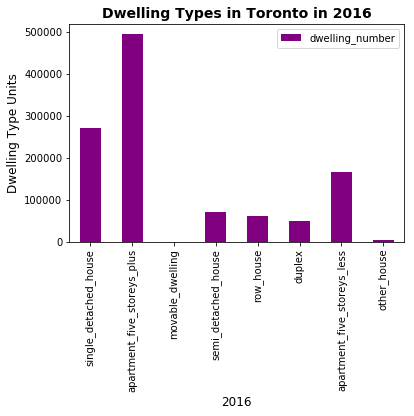

In [19]:
create_bar_chart(dwelling_types_2016, 'Dwelling Types in Toronto in 2016', '2016', 'Dwelling Type Units', 'purple')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [20]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

shelter_avg_costs = to_data[['shelter_costs_owned', 'shelter_costs_rented']].groupby(to_data.index).mean()

shelter_avg_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [21]:
# Helper create_line_chart function

def line_chart(data, title, xlabel, ylabel, color):
    plt.plot(data, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold')

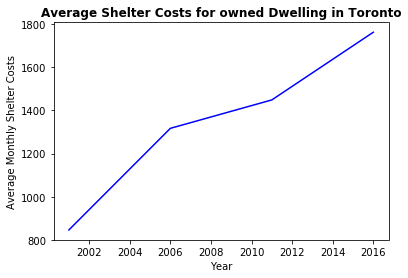

In [22]:
# Plotted line chart for owned dwellings
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
# YOUR CODE HERE!

line_chart(shelter_avg_costs['shelter_costs_owned'],'Average Shelter Costs for owned Dwelling in Toronto', 'Year', 'Average Monthly Shelter Costs', 'Blue')

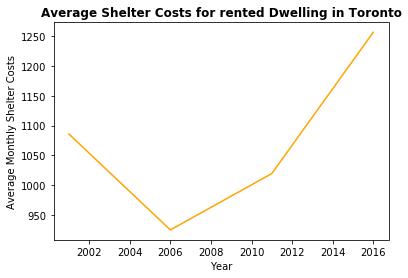

In [23]:

# Line chart for rented dwellings
# YOUR CODE HERE!

line_chart(shelter_avg_costs['shelter_costs_rented'], 'Average Shelter Costs for rented Dwelling in Toronto', 'Year', 'Average Monthly Shelter Costs', 'orange')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [24]:
# Calculate the average house value per year
# YOUR CODE HERE!

avg_hour_value = to_data[['average_house_value']].groupby(to_data.index).mean()

avg_hour_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

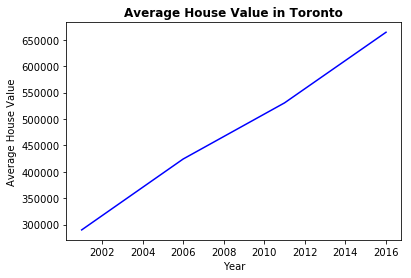

In [25]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!

line_chart(avg_hour_value, 'Average House Value in Toronto', 'Year', 'Average House Value', 'blue')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [28]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!

avg_by_neighbourhood = to_data[['neighbourhood','average_house_value']].groupby([to_data.index,"neighbourhood"]).mean().reset_index()

avg_by_neighbourhood.reset_index()

avg_by_neighbourhood.head()

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864

In [31]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

avg_by_neighbourhood.hvplot.line("year", "average_house_value",xlabel = "Year",ylabel = "Avg House Value",groupby = "neighbourhood",)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [33]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!

number_dwelling_per_year = to_data[["neighbourhood",'single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']].groupby([to_data.index,"neighbourhood"]).sum().reset_index()

number_dwelling_per_year.reset_index()

number_dwelling_per_year.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  
0       1295     195                          185            5  
1        455     105                          425            0  
2         50     185                          370            0  
3        605     275                         3710          165  
4        380      15                         1360            0

In [34]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

number_dwelling_per_year.hvplot.bar(groupby="neighbourhood", rot=90,width=650, height=500,xlabel='Year', ylabel='Dwelling Types Units')

:DynamicMap   [neighbourhood]
   :Bars   [index,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [46]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
df_expensive_neighbourhoods = to_data[["neighbourhood",'single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house',"average_house_value","shelter_costs_owned","shelter_costs_rented"]].groupby("neighbourhood").mean().sort_values(by='average_house_value',ascending=False)

df_expensive_neighbourhoods = df_expensive_neighbourhoods[:10]

df_expensive_neighbourhoods.reset_index(inplace=True)

df_expensive_neighbourhoods

neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   
5                      2310.00              0.00               288.75   
6                      1981.25              0.00                43.75   
7                      3392.50              0.00                12.50   
8                       576.25              0.00                66.25   
9                      3948.75              0.00               425.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   
5     201.25   162.5                      1192.50         2.50   
6      57.50   287.5                      1275.00        88.75   
7      16.25    82.5                       402.50         1.25   
8      48.75    20.0                       336.25         2.50   
9     212.50   172.5                      1308.75         6.25   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50  
5            981064.25              1873.75               1547.75  
6            930415.25              1786.75               1255.00  
7            851680.50              1722.75               1245.50  
8            843234.25              1736.75               1622.00  
9            813220.25              1680.75               1369.00

In [47]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

df_expensive_neighbourhoods.hvplot.bar(x='neighbourhood', y='average_house_value', rot=90, height=500,title='Top10 Expensive Neighbourhoods in Toronto', xlabel='Neighbourhood', ylabel='Avg House Value')

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [37]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [38]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

mean_neighborhood =  to_data[['neighbourhood','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house',"average_house_value","shelter_costs_owned","shelter_costs_rented"]].groupby("neighbourhood").mean().reset_index()

mean_neighborhood.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [39]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

join_df = pd.concat([df_neighbourhood_locations.set_index('neighbourhood'),mean_neighborhood.set_index('neighbourhood')], axis=1, join='inner').reset_index()

join_df.head()


neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

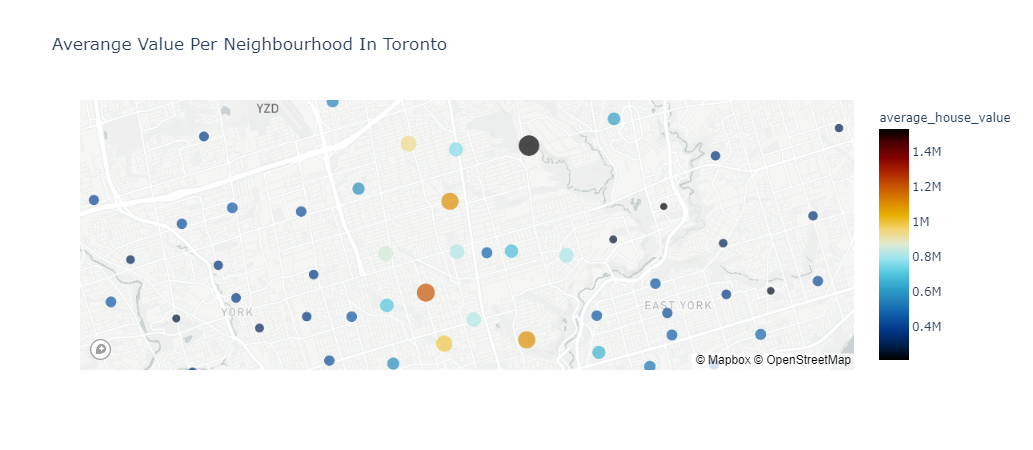

In [40]:
px.set_mapbox_access_token(map_box_api)
map_scatter = px.scatter_mapbox(join_df,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='average_house_value',
    color_continuous_scale = px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name='neighbourhood',
    title='Averange Value Per Neighbourhood In Toronto',
)
map_scatter.show()

In [29]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

map_1 = px.scatter_mapbox(
    combined_df,    
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    color_continuous_scale=px.colors.sequential.Cividis,
    zoom = 10
)

map_1.show()

In [54]:
map_1 = px.scatter_mapbox(
    combined_df,    
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    color_continuous_scale=px.colors.sequential.Cividis,
    zoom = 10
)

map_1.show()

In [31]:
map_1 = px.scatter_mapbox(
    combined_df,    
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    color_continuous_scale=px.colors.sequential.Cividis,
    zoom = 10
)

map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

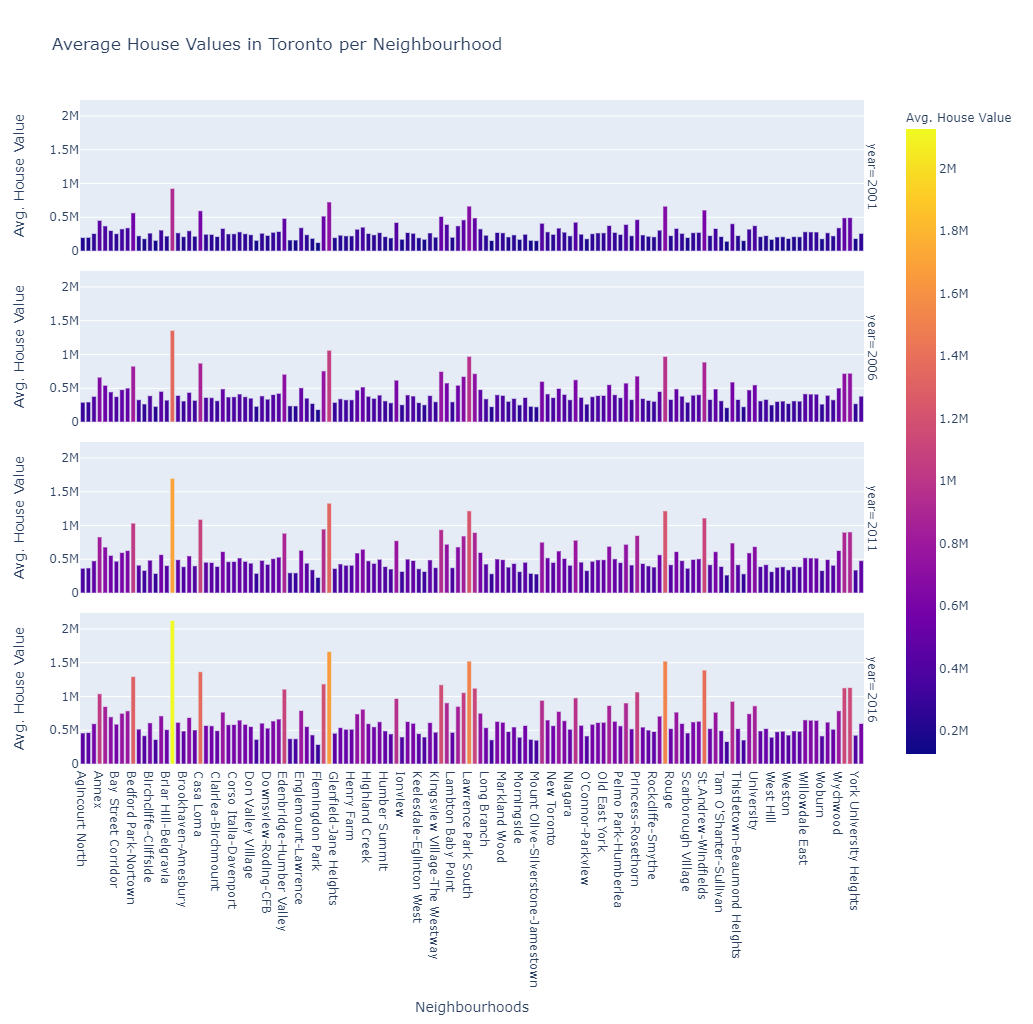

In [41]:
# YOUR CODE HERE!

fig = px.bar(
    to_data,
    x="neighbourhood",
    y="average_house_value",
    color= "average_house_value",
    height=1024,
    facet_row=to_data.index,
    title="Average House Values in Toronto per Neighbourhood",
    labels={
        "neighbourhood": "Neighbourhoods",
        "average_house_value": "Avg. House Value"
    }       
)
fig.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [53]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!
df_expensive_neighbourhoods_per_year = to_data[to_data["neighbourhood"].isin(df_expensive_neighbourhoods["neighbourhood"])]
df_expensive_neighbourhoods_per_year = df_expensive_neighbourhoods_per_year.reset_index()
df_expensive_neighbourhoods_per_year.head()

year                      neighbourhood  single_detached_house  \
0  2001               Bedford Park-Nortown                   4985   
1  2001  Bridle Path-Sunnybrook-York Mills                   2275   
2  2001                          Casa Loma                   1035   
3  2001                  Forest Hill North                   1565   
4  2001                  Forest Hill South                   1815   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         2080                 0                   45   
1                          110                 0                   25   
2                         1700                 0                  415   
3                         3380                 0                   10   
4                         2440                 5                   65   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0         40     210                         1235           15   
1         15      10                           20            0   
2        190     185                         1090            5   
3          0       0                          485            5   
4         45      85                         1010           15   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               565304                  933                  1491  
1               927466                 1983                  1790  
2               596077                 1241                  1500  
3               517466                  940                  1428  
4               726664                 1001                  1469

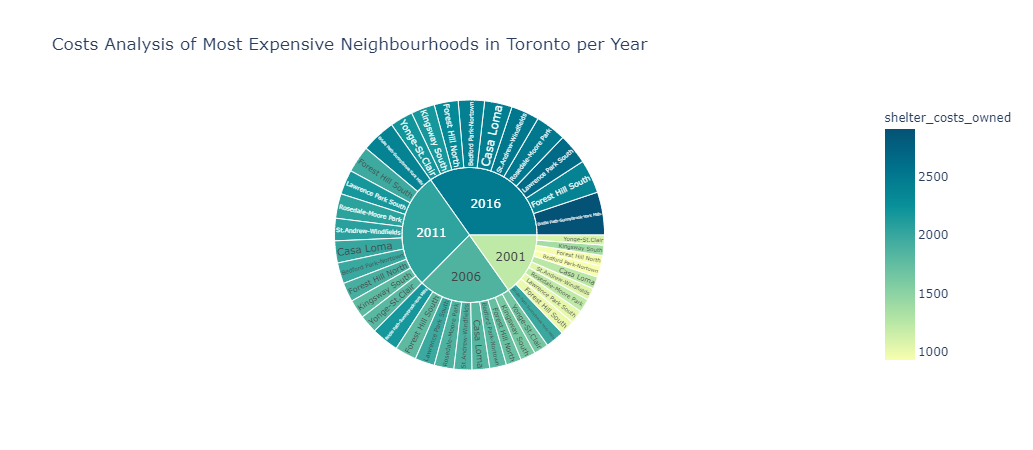

In [57]:
# Create the sunburst chart
# YOUR CODE HERE!
fig = px.sunburst(
    df_expensive_neighbourhoods_per_year,
    path=["year", "neighbourhood"],
    values="average_house_value",
    color="shelter_costs_owned",
    hover_data=["shelter_costs_owned", "shelter_costs_rented"],
    color_continuous_scale="bluyl",
    title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
)
fig.show()